In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [8]:
d1 = np.load('data0.npy')
l1 = np.load('lab0.npy')
d2 = np.load('data1.npy')
l2 = np.load('lab1.npy')
d3 = np.load('data2.npy')
l3 = np.load('lab2.npy')

train_data = np.concatenate((d1, d2, d3), axis=0)
train_labels = np.concatenate((l1, l2, l3), axis=0)
train_data = train_data / 255.0
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 348.4449 - mean_absolute_error: 17.7915
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 348.5072 - mean_absolute_error: 17.7433
Training:
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 327ms/step - loss: 91.3180 - mean_absolute_error: 7.4666 - val_loss: 34.4315 - val_mean_absolute_error: 4.7293
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 315ms/step - loss: 33.1223 - mean_absolute_error: 4.6294 - val_loss: 31.8629 - val_mean_absolute_error: 4.5412
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step - loss: 30.7004 - mean_absolute_error: 4.4588 - val_loss: 29.7125 - val_mean_absolute_error: 4.3855
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - loss: 28.2151 - mean_absolute_error: 4.2619 - val_loss: 27.8302 - val_mean_absolute_error: 4.2545
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 304ms/step - loss: 25.6550 - mean_absolute_error: 4.0848 - val_loss: 26.0237 - val_mean_absolute_error: 4.1138
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 292

Saving model


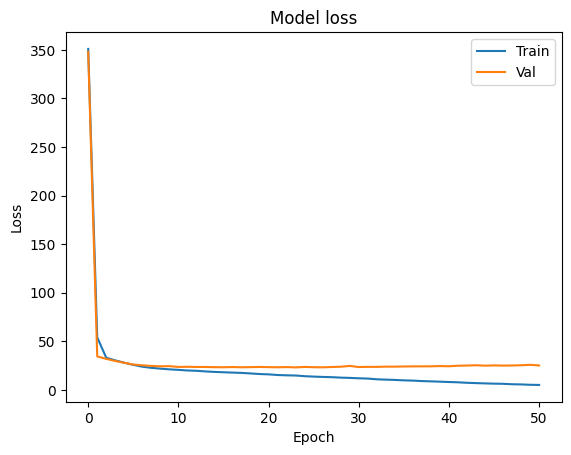

In [9]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)), MaxPooling2D((2, 2)), Flatten(), Dense(128, activation='relu'), Dense(1) ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
val_loss, val_mae = model.evaluate(X_test, y_test)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
train_loss, train_mae = model.evaluate(X_train, y_train)

print("Training:")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=512)

print("Saving model")
model.save('preliminary_cnn_model.h5')

history.history['val_loss'].insert(0, val_loss)
history.history['loss'].insert(0, train_loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()